## Predit NFL Touchdowns

Data from: https://github.com/nflverse/nflverse-data/releases/tag/pbp

Load necessary packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading data
* Load in CSV(2021,2022,2023)

In [ ]:
# Load data into a list
data_files = ["../data/play_by_play_2021.csv",
              "../data/play_by_play_2022.csv",
              "../data/play_by_play_2023.csv"]

print(data_files)

In [ ]:
# Load data into one data frame
df = pd.DataFrame()

df1 = pd.read_csv(data_files[0])
df2 = pd.read_csv(data_files[1])
df3 = pd.read_csv(data_files[2])

df = pd.concat([df1, df2, df3])

df = df.reset_index(drop=True)

In [11]:
print(df.shape)

(149022, 372)


In [12]:
# Print the first 10 rows of the dataframe
df.head(10)

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,NaN,NaN,NaN,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.399805,NaN,NaN,NaN,NaN,NaN,0.491433,-49.143299
3,76,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415
4,100,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.532898,0.256036,4.147637,2.0,0.965009,0.965009,0.978253,2.174652
5,122,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,1,1,-0.345293,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,152,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,1,2.692890,0.567838,7.420427,4.0,1.000000,1.000000,0.458989,54.101130
7,181,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,1,-1.009908,NaN,NaN,NaN,NaN,NaN,0.419833,-41.983327
8,218,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,1,-0.511090,1.036891,10.339405,9.0,0.478471,0.079696,0.684949,31.505138
9,253,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,1,2.182015,0.517965,3.045047,1.0,1.000000,0.998799,0.775463,22.453719


In [13]:
# List all columns in the dataframe
df.columns.values

array(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       'side_of_field', 'yardline_100', 'game_date',
       'quarter_seconds_remaining', 'half_seconds_remaining',
       'game_seconds_remaining', 'game_half', 'quarter_end', 'drive',
       'sp', 'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo',
       'ydsnet', 'desc', 'play_type', 'yards_gained', 'shotgun',
       'no_huddle', 'qb_dropback', 'qb_kneel', 'qb_spike', 'qb_scramble',
       'pass_length', 'pass_location', 'air_yards', 'yards_after_catch',
       'run_location', 'run_gap', 'field_goal_result', 'kick_distance',
       'extra_point_result', 'two_point_conv_result',
       'home_timeouts_remaining', 'away_timeouts_remaining', 'timeout',
       'timeout_team', 'td_team', 'td_player_name', 'td_player_id',
       'posteam_timeouts_remaining', 'defteam_timeouts_remaining',
       'total_home_score', 'total_away_score', 'posteam_score'

Explore features

In [14]:
# Basic quarterback stats
qb_feats = ['season', 'passer_id', 'passer', 'pass', 
            'complete_pass', 'interception', 
            'sack', 'yards_gained', 'touchdown']

# Group by season and passar
groupby_feats = ['season', 'passer_id', 'passer']

# Group by and aggregate the sum
qb_df = (df
         .loc[:, qb_feats]
         .groupby(groupby_feats,
                  as_index=False)
        .sum())

# Print the first 10 rows of the dataframe
qb_df.sample(10)

,season,passer_id,passer,pass,complete_pass,interception,sack,yards_gained,touchdown
164,2022,00-0033106,J.Goff,661,382.0,7.0,23.0,4363.0,32.0
73,2021,00-0034177,T.Boyle,100,61.0,6.0,0.0,542.0,3.0
52,2021,00-0032943,R.Dixon,1,0.0,0.0,0.0,0.0,0.0
281,2023,00-0033936,C.Beathard,68,40.0,0.0,6.0,360.0,1.0
297,2023,00-0034960,J.Meyers,4,2.0,0.0,0.0,17.0,2.0
108,2021,00-0036226,J.Eason,5,2.0,1.0,0.0,25.0,0.0
140,2022,00-0029263,R.Wilson,609,292.0,11.0,55.0,3374.0,18.0
248,2023,00-0028986,C.Keenum,68,34.0,3.0,6.0,231.0,2.0
324,2023,00-0036900,J.Chase,1,1.0,0.0,0.0,-7.0,0.0
357,2023,00-0039163,C.Stroud,645,354.0,5.0,38.0,4383.0,28.0


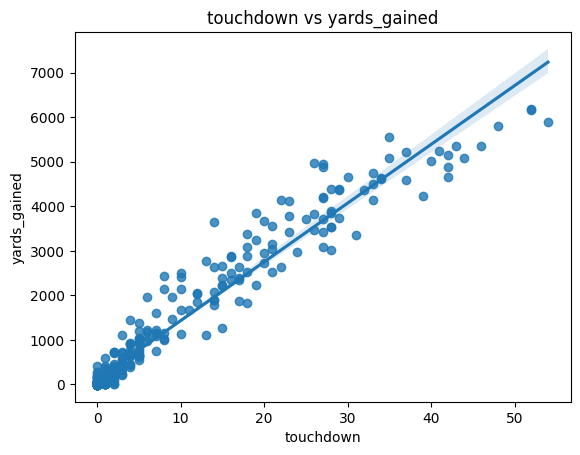

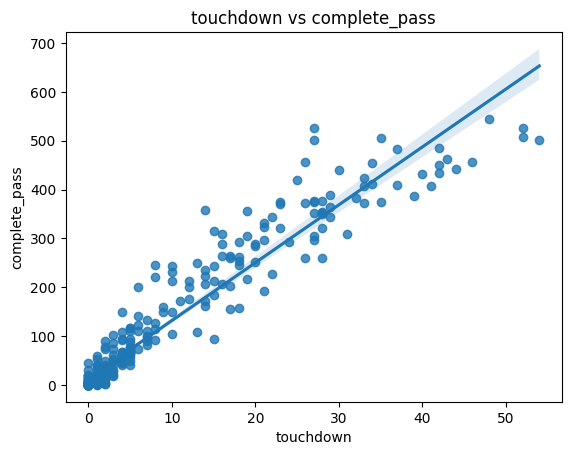

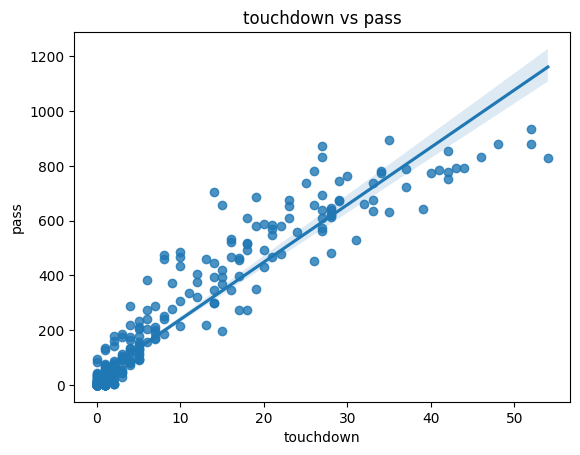

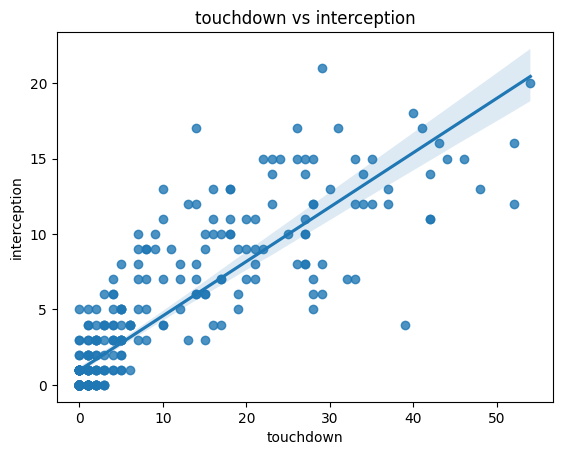

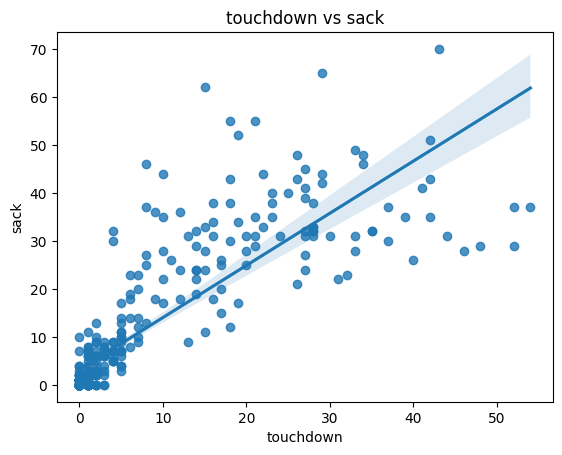

In [15]:
# See correlations with touchdowns
for y in["yards_gained", "complete_pass", "pass", "interception", "sack"]:
    sns.regplot(data=qb_df, x="touchdown", y=y)
    plt.title(f"touchdown vs {y}")
    plt.show()

In [16]:
# It seems that all correlate

# Create a new feature
_df = qb_df.copy()

# Add 1 to season
_df["season"] = _df["season"].add(1)

# Merge the dataframes
new_qb_df = (qb_df
             .merge(_df,
                    on=["season", "passer_id", "passer"],
                        suffixes=("", "_prev"),
                        how="left"))

new_qb_df.sample(10)

,season,passer_id,passer,pass,complete_pass,interception,sack,yards_gained,touchdown,pass_prev,complete_pass_prev,interception_prev,sack_prev,yards_gained_prev,touchdown_prev
301,2023,00-0035264,J.Stidham,80,40.0,1.0,7.0,459.0,2.0,107.0,53.0,3.0,7.0,688.0,4.0
269,2023,00-0033106,J.Goff,790,484.0,12.0,37.0,5212.0,37.0,661.0,382.0,7.0,23.0,4363.0,32.0
90,2021,00-0035040,D.Blough,2,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
309,2023,00-0035889,T.Townsend,1,1.0,0.0,0.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
75,2021,00-0034348,C.Sutton,1,1.0,0.0,0.0,16.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
105,2021,00-0035993,T.Huntley,242,122.0,4.0,18.0,1177.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
175,2022,00-0033869,M.Trubisky,206,117.0,5.0,11.0,1204.0,5.0,9.0,6.0,1.0,0.0,65.0,0.0
190,2022,00-0034857,J.Allen,785,407.0,17.0,41.0,5233.0,41.0,832.0,457.0,15.0,28.0,5361.0,46.0
2,2021,00-0022924,B.Roethlisberger,738,419.0,10.0,40.0,3724.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
64,2021,00-0033681,K.Cole,1,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


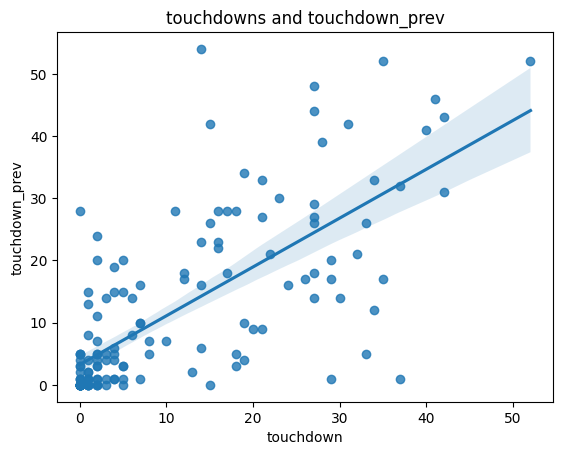

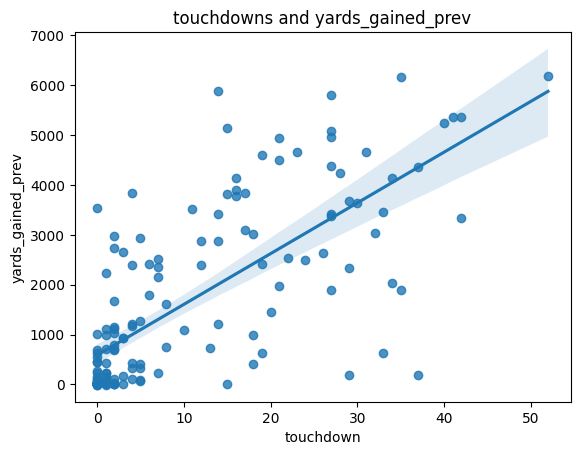

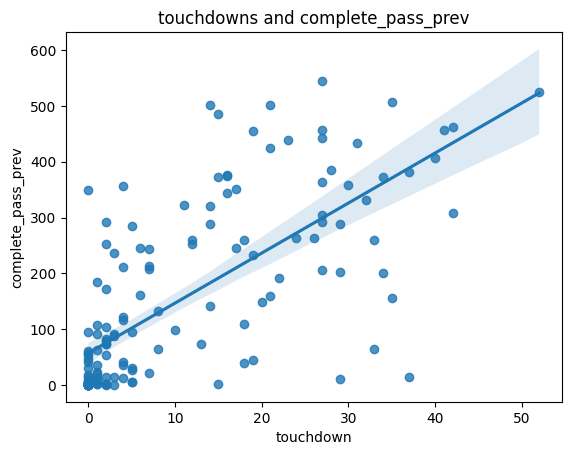

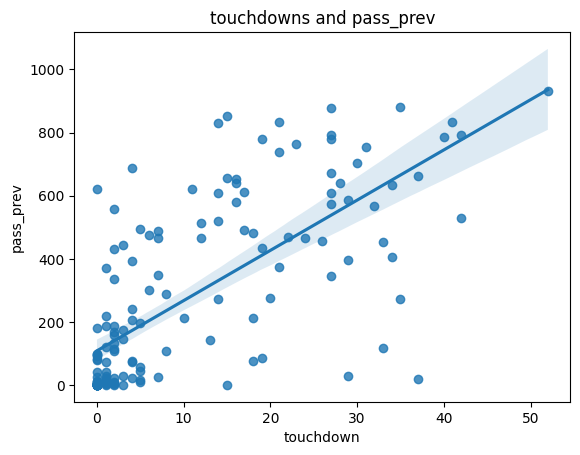

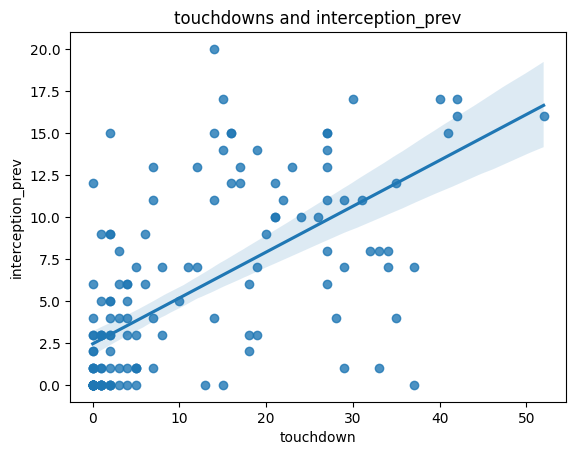

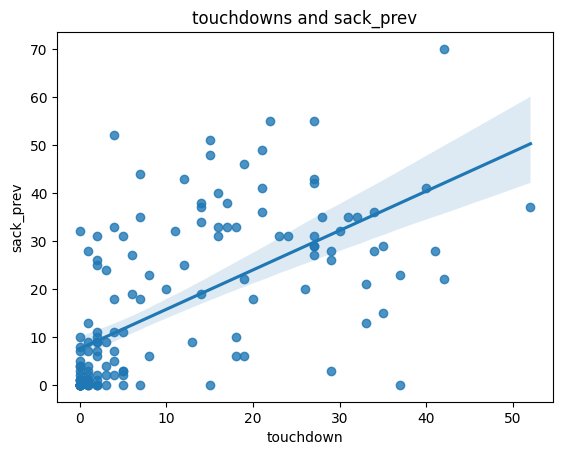

In [18]:
# Correlate with next season touchdowns
for y in ['touchdown_prev','yards_gained_prev', 'complete_pass_prev', 'pass_prev',  'interception_prev','sack_prev']:
  sns.regplot(data=new_qb_df, x='touchdown', y=y)
  plt.title(f"touchdowns and {y}")
  plt.show()

Machine learning

In [19]:
# Load in machine learning and stats packages
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

In [20]:
new_qb_df.sample(10)

,season,passer_id,passer,pass,complete_pass,interception,sack,yards_gained,touchdown,pass_prev,complete_pass_prev,interception_prev,sack_prev,yards_gained_prev,touchdown_prev
87,2021,00-0034899,J.Wolford,5,1.0,1.0,1.0,-3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
129,2022,00-0026158,J.Flacco,212,110.0,3.0,10.0,992.0,5.0,45.0,27.0,0.0,2.0,326.0,3.0
332,2023,00-0037013,Z.Wilson,460,221.0,7.0,46.0,2147.0,8.0,288.0,132.0,7.0,23.0,1610.0,7.0
343,2023,00-0038128,M.Willis,15,4.0,0.0,4.0,61.0,0.0,84.0,31.0,3.0,10.0,274.0,0.0
8,2021,00-0026158,J.Flacco,45,27.0,0.0,2.0,326.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
217,2022,00-0036425,D.Dallas,1,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
205,2022,00-0035993,T.Huntley,174,92.0,4.0,9.0,931.0,4.0,242.0,122.0,4.0,18.0,1177.0,6.0
281,2023,00-0033936,C.Beathard,68,40.0,0.0,6.0,360.0,1.0,12.0,7.0,1.0,1.0,30.0,0.0
15,2021,00-0027948,B.Gabbert,14,7.0,0.0,1.0,57.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
255,2023,00-0030565,G.Smith,584,323.0,9.0,31.0,3554.0,21.0,737.0,424.0,12.0,49.0,4497.0,33.0


In [ ]:
# Use the previous season performance as our features for our model 
features = ['pass_prev', 'complete_pass_prev', 
            'interception_prev', 'sack_prev',
            'yards_gained_prev', 'touchdown_prev']

# Predicting "current" season touchdowns 
target = 'touchdown' 

# Make a subset of data that has no null values
model_data = (new_qb_df
              .dropna(subset=features+[target]))

# Train on 2022 data  
train_data = (model_data
              .loc[model_data['season']==2022])

# Test on 2023 data 
test_data = (model_data
             .loc[model_data['season']==2023])

# Linear regression
model = LinearRegression()

# Train the model on the training data
model.fit(train_data.loc[:, features], 
          train_data[target])

# Predict on the test data 
preds = model.predict(test_data.loc[:, features])

preds = pd.Series(preds, index=test_data.index)

# Join predictions back to test dataset
test_data['preds'] = preds

In [22]:
# Run some basic statistics to examine the quality of the prediction

rmse = mean_squared_error(test_data['touchdown'], test_data['preds'])**0.5
r2 = pearsonr(test_data['touchdown'], test_data['preds'])[0]**2
print(f"rmse: {rmse}\nr2: {r2}")

rmse: 11.033586201462972
r2: 0.3127821203339658


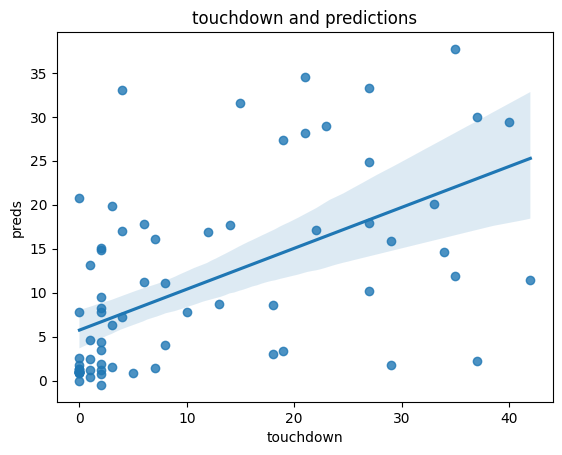

In [23]:
# Visualize the outputs 
sns.regplot(data=test_data, x='touchdown', y='preds')
plt.title('touchdown and predictions')
plt.show()

In [29]:
test_data.loc[:, ['season', 'passer_id', 'passer', 'touchdown', 'preds']].sort_values('touchdown', ascending=False).sample(10)

,season,passer_id,passer,touchdown,preds
331,2023,00-0036972,M.Jones,14.0,17.696203
271,2023,00-0033275,P.Walker,1.0,4.670566
327,2023,00-0036928,K.Trask,0.0,1.325016
240,2023,00-0026158,J.Flacco,18.0,8.604860
310,2023,00-0035993,T.Huntley,3.0,6.365109
299,2023,00-0035228,K.Murray,12.0,16.920495
270,2023,00-0033119,J.Brissett,3.0,19.904874
266,2023,00-0032950,C.Wentz,2.0,9.534769
330,2023,00-0036971,T.Lawrence,23.0,28.908260
296,2023,00-0034955,B.Rypien,0.0,1.744798
